In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [58]:
bank = pd.read_csv("projektbanka.csv")

In [59]:
bank.head(30)

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,muško,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,žensko,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,muško,podstanar,magisterij
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,f,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,f,podstanar,SSS
5,1006,Hrvatska,80317.26,5650.77,45000.00,37.0,18.0,1.0,1.0,f,vl,SSS
6,1007,Hrvatska,116584.26,9420.09,40204.15,35.0,16.0,30.0,3.0,žensko,podstanar,magisterij
7,1008,Hrvatska,100348.69,6374.97,33795.05,27.0,16.0,5.0,2.0,muško,vlasnik,SSS
8,1009,Hrvatska,75610.51,4796.56,45000.00,42.0,17.0,24.0,5.0,m,NaN,SSS
9,1010,Hrvatska,95851.20,6706.74,45000.00,44.0,23.0,4.0,NaN,muško,podstanar,SSS


### Nakon naredbe 'head(30)' koja prikazuje prvih 30 klijenata, vidljivo je kako svaki korisnik ima svoj identifikacijski broj pod varijablom 'ID_Klijenta'. Također vidljivo je da su svi klijenti iz Hrvatske. Zanimljivo je da 'Trenutni_Dug_EUR' ima najčešću vrijednost 45 000. 
### Važno je napomenuti kako su string vrijednosti u stupcima 'Spol', 'Stambeni_Status' i 'Obrazovanje' zapisane u različitim oblicima, a misli se na osnovnu podjelu, primjerice muško i žensko je također zapisano kao M i m te F i f, što će biti potrebno izjednačiti

In [60]:
### Provjerit ćemo kategoričke varijable, konkretno koliko podataka imamo u različitim kolonama. S obzirom da nam je poznato kako postoje nedostajuće vrijednosti, koristit ćemo naredbu koja otpisuje nepostojeće vrijednosti.
bank['Spol'].value_counts(dropna=False)


Spol
muško     725
M         418
m         365
f         221
žensko    190
NaN       101
Name: count, dtype: int64

### Ovime vidimo kako je kategorizirano "više" spolova no što postoji, stoga će biti potrebno ponovno obraditi ovaj dio nakon popravljanja nedostajućih vrijednosti

#### Zatim ćemo izbaciti stupac država

In [61]:
bank2 = bank.drop(columns='Država')

## Nedostajuće vrijednosti
### U 4. retku pod Godine_Kreditne_Povijesti, vidljivo je kako piše NaN, što znači da podatak nedostaje i bit će potrebno identificirati sve nedostajuće vrijednosti
### Također u retku 9 i 29 vidimo nedostajuće vrijednosti pod 'Broj_članova_Kućanstva' i 'Stanbeni_status' što će biti potrebno ispraviti

In [62]:
bank2.tail(30)

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
1990,2991,101008.19,10000.000000,45000.00,18.0,NaN,27.0,2.0,M,vlasnik,magisterij
1991,2992,100085.83,NaN,45000.00,30.0,14.0,16.0,5.0,muško,podstanar,magisterij
1992,2993,108778.27,6752.730000,45000.00,18.0,9.0,29.0,1.0,muško,podstanar,SSS
1993,2994,99166.08,8370.470000,45000.00,43.0,15.0,14.0,1.0,M,podstanar,VSS
1994,2995,92028.96,8067.030000,45000.00,18.0,11.0,13.0,3.0,muško,podstanar,VSS
1995,2996,106403.00,7179.270000,45000.00,NaN,20.0,13.0,2.0,M,vlasnik,SSS
1996,2997,84469.57,6207.630000,45000.00,18.0,1.0,9.0,4.0,muško,podstanar,SSS
1997,2998,67362.51,3882.130000,45000.00,32.0,11.0,1.0,4.0,muško,podstanar,SSS
1998,2999,81738.66,7183.220000,45000.00,51.0,25.0,26.0,3.0,M,podstanar,VSS
1999,3000,70101.95,5588.320000,45000.00,39.0,18.0,30.0,3.0,NaN,podstanar,NaN


### Nakon naredbe bank2.tail(31), vidljivo je posljednjih 30 klijenata u csv datoteci.
### Iz tablice iznad može se iščitati nedostajuća vrijednost u retku 1990 pod 'Staž_Godine', 1991 pod 'Mjesečna_Primanje_EUR' te u retku 2002 pod 'Starost_Klijenta'

### Prije samog ispravka nedostajućih vrijednosti, potrebno je provjeriti kategoriju podataka, njihove vrijednosti i konačnu sumu nedostajućih vrijednosti pomoću naredbe isna().sum()

In [63]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2020 non-null   int64  
 1   Odobreni_Iznos_EUR         2020 non-null   float64
 2   Mjesečna_Primanje_EUR      1919 non-null   float64
 3   Trenutni_Dug_EUR           1919 non-null   float64
 4   Starost_Klijenta           1919 non-null   float64
 5   Staž_Godine                1919 non-null   float64
 6   Godine_Kreditne_Povijesti  1919 non-null   float64
 7   Broj_članova_Kućanstva     1919 non-null   float64
 8   Spol                       1919 non-null   object 
 9   Stambeni_Status            1919 non-null   object 
 10  Obrazovanje                1919 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 173.7+ KB


### Ovime se potvrđuje da osim stupaca 'ID_Klijenta' i 'Odobreni_Iznos_EUR ', svi ostali imaju nedostajuće vrijednosti

In [ ]:
### Vidljivo je kako su sve numeričke varijable u float obliku osim ID-a klijenta. To će biti kasnije potrebno promijeniti kako bi tablica bila preglednija

In [64]:
bank2.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2020.000000,2020.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000
mean,2000.603465,85929.815401,6694.880573,43534.26522,35.178739,15.392392,15.137051,2.647212
std,576.920116,19750.659531,1838.166648,5928.30992,9.854248,5.660518,8.801156,1.587254
min,1001.000000,20174.650000,1644.560000,0.00000,12.000000,0.000000,0.000000,-5.000000
25%,1502.750000,72694.725000,5467.530000,45000.00000,28.000000,11.000000,8.000000,1.000000
50%,2002.500000,85893.835000,6618.190000,45000.00000,35.000000,15.000000,15.000000,2.000000
75%,2498.250000,98722.072500,7935.160000,45000.00000,42.000000,19.000000,23.000000,4.000000
max,3000.000000,150000.000000,19246.942762,96932.52968,100.000000,37.000000,30.000000,9.000000


In [ ]:
### Vidljive su razne anomalije poput negativnog broja članova obitelji, maloljetne osobe u sustavu kredita, 100-godišnjaka na odobrenju kredita i sl., no potrebno je provesti daljnje analize kako bi se to utvrdilo

In [65]:
bank2.isna().sum()

ID_Klijenta                    0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

### Zapisano u brojčanom iznosu, postoji 101 nedostajuća vrijednost za svaki redak osim za prva dva.

# Ispravak nedostajućih brojčanih vrijednosti
## Izračun prosjeka vrijednosti za 'Mjesečna_Primanje_EUR', 'Trenutni_Dug_EUR', 'Starost_Klijenta', 'Godine_Kreditne_Povijesti', 'Broj_članova_Kućanstva', 'Staž_Godine'

In [66]:
prosjecna_primanja = bank2['Mjesečna_Primanje_EUR'].mean()
prosjecni_dug = bank2['Trenutni_Dug_EUR'].mean()
prosjecna_starost = bank2['Starost_Klijenta'].mean()
prosjecne_godine_kredita = bank2['Godine_Kreditne_Povijesti'].mean()
prosjecni_broj_ukucana = bank2['Broj_članova_Kućanstva'].mean()
prosjecni_staz = bank2['Staž_Godine'].mean()

In [67]:
### Zamjena prosječnih vrijednosti za NaN vrijednosti

In [68]:
bank2['Mjesečna_Primanje_EUR'].fillna(prosjecna_primanja, inplace=True)
bank2['Trenutni_Dug_EUR'].fillna(prosjecni_dug, inplace=True)
bank2['Starost_Klijenta'].fillna(prosjecna_starost, inplace=True)
bank2['Godine_Kreditne_Povijesti'].fillna(prosjecne_godine_kredita, inplace=True)
bank2['Broj_članova_Kućanstva'].fillna(prosjecni_broj_ukucana, inplace=True)
bank2['Staž_Godine'].fillna(prosjecni_staz, inplace=True)

C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\2989881485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank2['Mjesečna_Primanje_EUR'].fillna(prosjecna_primanja, inplace=True)
C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\2989881485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

# Izjednjačavanje modalnih vrijednosti

In [69]:
mapping = {'M': 'muško', 'm': 'muško', 'f': 'žensko', 'F':'žensko'}
bank2['Spol'] = bank2['Spol'].replace(mapping)

mapping_stambeni = {'Vlasnik': 'vlasnik', 'vl': 'vlasnik'}
bank2['Stambeni_Status'] = bank2['Stambeni_Status'].replace(mapping_stambeni)

mapping_obrazovanje = {'magisterij': 'VSS'}
bank2['Obrazovanje'] = bank2['Obrazovanje'].replace(mapping_obrazovanje) #smatramo gspn. GPT i ja da su VSS i magisterij isto :)

# Ispravak nedostajućih string vrijednosti
## Izračun mod vrijednosti za 'Spol', 'Stambeni_Status' i 'Obrazovanje'
## Popunjavanje nedostajućih vrijednosti s modalnim vrijednostima

In [70]:
spol_mod = bank2['Spol'].mode()[0]
stan_mod = bank2['Stambeni_Status'].mode()[0]
obrazovanje_mod = bank2['Obrazovanje'].mode()[0] # [0] vraća prvu vrijednost moda u slučaju da postoji više modova

bank2['Spol'].fillna(spol_mod, inplace=True)
bank2['Stambeni_Status'].fillna(stan_mod, inplace=True)
bank2['Obrazovanje'].fillna(obrazovanje_mod, inplace=True)

C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\1206002257.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank2['Spol'].fillna(spol_mod, inplace=True)
C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\1206002257.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [71]:
bank2

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,94934.28,5897.210000,45000.00,28.0,12.0,9.000000,2.0,muško,podstanar,SSS
1,1002,82234.71,5466.710000,45000.00,34.0,13.0,23.000000,3.0,žensko,podstanar,SSS
2,1003,97953.77,9539.260000,45000.00,27.0,11.0,16.000000,2.0,muško,podstanar,VSS
3,1004,115460.60,9433.690000,39059.44,32.0,17.0,30.000000,4.0,žensko,podstanar,VSS
4,1005,80316.93,4671.030000,45000.00,18.0,10.0,15.137051,2.0,žensko,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...
2015,2658,111351.95,7401.280000,27290.05,18.0,2.0,9.000000,1.0,žensko,podstanar,SSS
2016,1873,57413.62,3205.300000,45000.00,18.0,0.0,8.000000,6.0,žensko,podstanar,SSS
2017,2703,97694.43,9542.150000,45000.00,26.0,13.0,25.000000,1.0,muško,vlasnik,VSS
2018,1528,85961.70,6112.710000,45000.00,41.0,19.0,21.000000,4.0,muško,vlasnik,SSS


In [72]:
#### Provjera
bank2.isna().sum()

ID_Klijenta                  0
Odobreni_Iznos_EUR           0
Mjesečna_Primanje_EUR        0
Trenutni_Dug_EUR             0
Starost_Klijenta             0
Staž_Godine                  0
Godine_Kreditne_Povijesti    0
Broj_članova_Kućanstva       0
Spol                         0
Stambeni_Status              0
Obrazovanje                  0
dtype: int64

In [73]:
bank2.head(31)

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,94934.28,5897.21,45000.00,28.0,12.0,9.000000,2.000000,muško,podstanar,SSS
1,1002,82234.71,5466.71,45000.00,34.0,13.0,23.000000,3.000000,žensko,podstanar,SSS
2,1003,97953.77,9539.26,45000.00,27.0,11.0,16.000000,2.000000,muško,podstanar,VSS
3,1004,115460.60,9433.69,39059.44,32.0,17.0,30.000000,4.000000,žensko,podstanar,VSS
4,1005,80316.93,4671.03,45000.00,18.0,10.0,15.137051,2.000000,žensko,podstanar,SSS
5,1006,80317.26,5650.77,45000.00,37.0,18.0,1.000000,1.000000,žensko,vlasnik,SSS
6,1007,116584.26,9420.09,40204.15,35.0,16.0,30.000000,3.000000,žensko,podstanar,VSS
7,1008,100348.69,6374.97,33795.05,27.0,16.0,5.000000,2.000000,muško,vlasnik,SSS
8,1009,75610.51,4796.56,45000.00,42.0,17.0,24.000000,5.000000,muško,podstanar,SSS
9,1010,95851.20,6706.74,45000.00,44.0,23.0,4.000000,2.647212,muško,podstanar,SSS


### Po danim podacima vidljivo je kako su nedostajuće vrijednosti ispravljene

# Duplicirane vrijednosti
## Provjeriti duple vrijednosti i ukloniti ih

In [74]:
bank2.duplicated().sum()

12

In [75]:
bank2.drop_duplicates(inplace=True)

In [76]:
bank2.duplicated().sum()

0

In [77]:
### Ovo potvrđuje da su svi duplikati riješeni

### Odlučio sam brojiti staž od 16. godine***

In [78]:
# Pregled vrijednosti
## Nakon utvrđivanja nedostajućih vrijednosti i duplikata, potrebno je provijeriti logiku iza dostupnih vrijednosti
### Najprije želim vidjeti krajnje vrijednosti za 'Starost_Klijenta' te moram li ih izbaciti

In [79]:
podaci_staz_starost=bank2.groupby("Staž_Godine")["Starost_Klijenta"]
podaci_staz_starost.mean() #prosječan staž za svaku godinu života klijenta

Staž_Godine
0.000000     18.000000
1.000000     24.044685
2.000000     18.500000
3.000000     23.596963
4.000000     25.214316
5.000000     22.787879
6.000000     21.948671
7.000000     23.171104
8.000000     25.158030
9.000000     25.929027
10.000000    26.581174
11.000000    28.562075
12.000000    30.094047
13.000000    32.893804
14.000000    32.817347
15.000000    34.540394
15.392392    35.242933
16.000000    36.248665
17.000000    38.122690
18.000000    38.514595
19.000000    40.364459
20.000000    41.665485
21.000000    42.744203
22.000000    43.446690
23.000000    46.528065
24.000000    46.129606
25.000000    49.505257
26.000000    47.327662
27.000000    51.770416
28.000000    52.636364
29.000000    51.617874
30.000000    49.454106
31.000000    57.666667
32.000000    61.250000
33.000000    58.500000
35.000000    63.000000
37.000000    65.000000
Name: Starost_Klijenta, dtype: float64

In [80]:
bank2.Starost_Klijenta.value_counts()

Starost_Klijenta
35.178739     101
18.000000      95
33.000000      81
38.000000      79
40.000000      79
37.000000      76
34.000000      76
30.000000      72
39.000000      72
31.000000      69
35.000000      68
41.000000      66
29.000000      65
32.000000      64
27.000000      62
42.000000      59
36.000000      57
28.000000      52
43.000000      52
26.000000      52
44.000000      51
47.000000      50
25.000000      45
24.000000      43
45.000000      40
22.000000      38
23.000000      38
46.000000      34
50.000000      30
21.000000      29
48.000000      27
49.000000      25
20.000000      23
52.000000      21
51.000000      19
19.000000      18
55.000000      16
53.000000      14
54.000000      11
56.000000       8
58.000000       6
65.000000       5
57.000000       4
59.000000       4
12.000000       3
64.000000       2
60.000000       2
61.000000       1
62.000000       1
63.000000       1
90.000000       1
100.000000      1
Name: count, dtype: int64

In [81]:
bank2.Starost_Klijenta.min()

12.0

In [82]:
bank2.Starost_Klijenta.max()

100.0

In [83]:
### Moramo ukloniti 12.godišnjaka, 90-godišnjaka i 100-godišnjaka
bank3 = bank2.copy()
starosti_za_uklanjanje = [12.0, 90.0, 100.0]
bank3 = bank3[~bank3['Starost_Klijenta'].isin(starosti_za_uklanjanje)]
bank3.reset_index(drop=True, inplace=True)
bank3['Starost_Klijenta'].value_counts(dropna=False)

Starost_Klijenta
35.178739    101
18.000000     95
33.000000     81
40.000000     79
38.000000     79
34.000000     76
37.000000     76
39.000000     72
30.000000     72
31.000000     69
35.000000     68
41.000000     66
29.000000     65
32.000000     64
27.000000     62
42.000000     59
36.000000     57
43.000000     52
26.000000     52
28.000000     52
44.000000     51
47.000000     50
25.000000     45
24.000000     43
45.000000     40
23.000000     38
22.000000     38
46.000000     34
50.000000     30
21.000000     29
48.000000     27
49.000000     25
20.000000     23
52.000000     21
51.000000     19
19.000000     18
55.000000     16
53.000000     14
54.000000     11
56.000000      8
58.000000      6
65.000000      5
57.000000      4
59.000000      4
60.000000      2
64.000000      2
62.000000      1
61.000000      1
63.000000      1
Name: count, dtype: int64

In [84]:
### Zamjetio sam logičku grešku s godinama, naime primjenio sam prosjek godina za NaN vrijednosti mada nisam provjerio nelogičnosti gdje bi ispalo da osoba od 19 godina ima 5 godina staža i slično.
bank4 = bank3.copy()
bank4['Starost_Pri_Pocetku_Staza'] = bank4['Starost_Klijenta'] - bank4['Staž_Godine']
nelogicna_maska = bank4['Starost_Pri_Pocetku_Staza'] < 16
bank4.loc[nelogicna_maska, 'Staž_Godine'] = bank4['Starost_Klijenta'] - 16
bank4['Starost_Pri_Pocetku_Staza'] = bank4['Starost_Klijenta'] - bank4['Staž_Godine']
bank4[['ID_Klijenta', 'Starost_Klijenta', 'Staž_Godine', 'Starost_Pri_Pocetku_Staza']].head(30)

,ID_Klijenta,Starost_Klijenta,Staž_Godine,Starost_Pri_Pocetku_Staza
0,1001,28.0,12.0,16.0
1,1002,34.0,13.0,21.0
2,1003,27.0,11.0,16.0
3,1004,32.0,16.0,16.0
4,1005,18.0,2.0,16.0
5,1006,37.0,18.0,19.0
6,1007,35.0,16.0,19.0
7,1008,27.0,11.0,16.0
8,1009,42.0,17.0,25.0
9,1010,44.0,23.0,21.0


In [85]:
prag_pocetka_staza = 16
nelogicna_maska = bank4['Starost_Pri_Pocetku_Staza'] < prag_pocetka_staza
bank4[nelogicna_maska][['ID_Klijenta', 'Starost_Klijenta', 'Staž_Godine', 'Starost_Pri_Pocetku_Staza']] # Provjera obavljena i dokazuje kako više nema nelogičnosti u odnosu godina i staža

,ID_Klijenta,Starost_Klijenta,Staž_Godine,Starost_Pri_Pocetku_Staza


In [86]:
bank4.Starost_Klijenta.min()

18.0

In [87]:
bank4.Starost_Klijenta.max()

65.0

### Starost klijenta kretao se u rasponu od 12 do 100 godina. Minimalni broj godina je bio sumnjiv jer bi maloljetna osoba bila dužnik i imala odobren kredit, a najstarija osoba je bila sumnjiva jer zašto bi se odobrio kredit osobi u dubokoj starosti
### Sadašnji podaci pokazuju precizni raspon godišta od 18 do 65
### Nadalje je potrebno srediti numeričke nelogičnosti

In [88]:
bank4.min()

ID_Klijenta                       1001
Odobreni_Iznos_EUR            20174.65
Mjesečna_Primanje_EUR          1644.56
Trenutni_Dug_EUR                   0.0
Starost_Klijenta                  18.0
Staž_Godine                        0.0
Godine_Kreditne_Povijesti          0.0
Broj_članova_Kućanstva            -5.0
Spol                             muško
Stambeni_Status              podstanar
Obrazovanje                        SSS
Starost_Pri_Pocetku_Staza         16.0
dtype: object

In [89]:
### Zamjećujem kako je broj članova kućanstva negativan. Zasigurno se radi o grešci

In [90]:
bank4.max()

ID_Klijenta                          3000
Odobreni_Iznos_EUR               150000.0
Mjesečna_Primanje_EUR        19246.942762
Trenutni_Dug_EUR              96932.52968
Starost_Klijenta                     65.0
Staž_Godine                          37.0
Godine_Kreditne_Povijesti            30.0
Broj_članova_Kućanstva                9.0
Spol                               žensko
Stambeni_Status                   vlasnik
Obrazovanje                           VSS
Starost_Pri_Pocetku_Staza       49.607608
dtype: object

In [91]:
### Provjerit ću top 10 max dugova i prihoda kako bih utvrdio radili se o outlierima
top_10_primanja = bank4.sort_values(by='Mjesečna_Primanje_EUR', ascending=False).head(10)
top_10_primanja

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
1075,2078,76437.70,19246.942762,45000.00,41.000000,15.0,9.000000,3.0,žensko,podstanar,VSS,26.000000
957,1960,93954.17,18645.758565,45000.00,35.178739,9.0,7.000000,3.0,muško,podstanar,VSS,26.178739
1674,2679,104966.22,18494.558808,45000.00,47.000000,23.0,30.000000,1.0,muško,podstanar,VSS,24.000000
1470,2474,85293.76,18342.513107,45000.00,24.000000,8.0,15.137051,4.0,muško,vlasnik,SSS,16.000000
1995,1660,82112.79,17253.945264,45000.00,41.000000,18.0,25.000000,3.0,žensko,podstanar,VSS,23.000000
578,1580,107875.08,17240.618424,34194.16,53.000000,27.0,13.000000,2.0,muško,podstanar,VSS,26.000000
719,1721,91156.04,15501.440919,45000.00,55.000000,25.0,17.000000,4.0,muško,podstanar,VSS,30.000000
405,1407,63647.59,13078.671541,45000.00,22.000000,6.0,30.000000,1.0,žensko,vlasnik,SSS,16.000000
402,1404,85939.61,11698.402763,45000.00,32.000000,13.0,27.000000,1.0,muško,podstanar,SSS,19.000000
1797,2803,70831.86,11428.708371,45000.00,23.000000,7.0,5.000000,2.0,muško,vlasnik,VSS,16.000000


In [92]:
top_10_dugovi = bank4.sort_values(by='Trenutni_Dug_EUR', ascending=False).head(10)
top_10_dugovi 

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
443,1445,58910.61,2959.000000,96932.529680,35.178739,12.0,27.0,4.0,muško,podstanar,SSS,23.178739
1958,2964,97904.31,5839.200000,90661.461809,43.000000,19.0,12.0,5.0,muško,podstanar,SSS,24.000000
1203,2206,85811.83,7634.410000,88134.315453,35.178739,7.0,12.0,2.0,muško,podstanar,VSS,28.178739
807,1809,110115.12,10000.000000,79202.868342,44.000000,22.0,13.0,3.0,muško,podstanar,VSS,22.000000
1415,2419,115569.37,6694.880573,73851.630349,22.000000,6.0,7.0,1.0,muško,podstanar,VSS,16.000000
867,1869,98170.89,6618.190000,66442.320277,40.000000,18.0,15.0,5.0,muško,podstanar,SSS,22.000000
1354,2358,92836.08,7236.600000,64564.673635,18.000000,2.0,12.0,4.0,muško,podstanar,VSS,16.000000
1452,2456,49784.74,5518.730000,56152.869713,56.000000,23.0,20.0,2.0,muško,podstanar,VSS,33.000000
1195,2198,96049.80,6234.870000,55340.024241,18.000000,2.0,19.0,4.0,muško,vlasnik,SSS,16.000000
1062,2065,77751.18,7055.240000,52433.432938,20.000000,4.0,1.0,3.0,muško,vlasnik,VSS,16.000000


### Dugovi i primanja su uredu

In [93]:
bank4['Mjesečna_Primanje_EUR'].value_counts().loc[10000.0]

55

In [94]:
bank4['Trenutni_Dug_EUR'].value_counts().loc[45000.0]

1643

In [95]:
### Previše klijenata ima dug u iznosu 45000 stoga mi se čini da je ova vrijednost placeholder. Zato ću pokušati stratificirano imputirati podatke, drugim rječima, zamijenit ću vrijednost za prosjek klijenata sa sličnim preostalim vrijednostima.
bank5 = bank4.copy()
bank5['Trenutni_Dug_EUR'] = bank5['Trenutni_Dug_EUR'].replace(45000.0, np.nan)
bank5['Trenutni_Dug_EUR'] = bank5.groupby(['Spol', 'Stambeni_Status'])['Trenutni_Dug_EUR'].transform(lambda x: x.fillna(x.median()))
bank5['Trenutni_Dug_EUR'].fillna(bank5['Trenutni_Dug_EUR'].median(), inplace=True)

C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\3668409784.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank5['Trenutni_Dug_EUR'].fillna(bank5['Trenutni_Dug_EUR'].median(), inplace=True)


In [96]:
### Napravit ću isto za Mjesečna primanja
bank5['Mjesečna_Primanje_EUR'] = bank5['Mjesečna_Primanje_EUR'].replace(10000.0, np.nan)
bank5['Mjesečna_Primanje_EUR'] = bank5.groupby(['Spol', 'Stambeni_Status','Odobreni_Iznos_EUR'])['Mjesečna_Primanje_EUR'].transform(lambda x: x.fillna(x.median()))
bank5['Mjesečna_Primanje_EUR'].fillna(bank5['Mjesečna_Primanje_EUR'].median(), inplace=True)

C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\3864086571.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank5['Mjesečna_Primanje_EUR'].fillna(bank5['Mjesečna_Primanje_EUR'].median(), inplace=True)


In [97]:
top_10_starost_pocetak_staza = bank5.sort_values(by='Starost_Pri_Pocetku_Staza', ascending=False).head(10)
top_10_starost_pocetak_staza[['ID_Klijenta', 'Starost_Klijenta', 'Staž_Godine', 'Starost_Pri_Pocetku_Staza']]
top_10_starost_pocetak_staza # Sumnjivo mi se čini da je osoba tek s nenavršenih 50 godina krenula u karijeru, no prema danim podacima, sve je moguće!

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
1712,2717,91639.61,9334.55,36819.76000,65.0,15.392392,27.000000,5.000000,muško,vlasnik,VSS,49.607608
1977,2983,72465.66,8826.73,43534.26522,65.0,15.392392,28.000000,1.000000,muško,podstanar,VSS,49.607608
470,1472,38961.58,3239.35,40216.11500,59.0,15.392392,25.000000,1.000000,žensko,podstanar,SSS,43.607608
199,1201,92155.75,9265.55,43534.26522,53.0,13.000000,26.000000,1.000000,muško,podstanar,VSS,40.000000
241,1243,95099.75,7545.04,43534.26522,55.0,15.392392,20.000000,2.647212,muško,podstanar,VSS,39.607608
1391,2395,77693.57,7474.04,36819.76000,55.0,15.392392,16.000000,3.000000,muško,vlasnik,VSS,39.607608
1682,2687,75707.65,8674.75,36819.76000,60.0,22.000000,15.137051,2.000000,muško,vlasnik,VSS,38.000000
1064,2067,59106.37,5456.12,43534.26522,53.0,15.392392,15.137051,1.000000,muško,podstanar,VSS,37.607608
800,1802,74679.11,4949.91,43534.26522,62.0,25.000000,11.000000,2.000000,muško,podstanar,SSS,37.000000
1069,2072,94540.82,6192.89,43534.26522,52.0,15.392392,14.000000,3.000000,muško,podstanar,SSS,36.607608


In [98]:
top_10_min_djece = bank5.sort_values(by='Broj_članova_Kućanstva', ascending=True).head(10)
top_10_min_djece[['ID_Klijenta', 'Broj_članova_Kućanstva']]

,ID_Klijenta,Broj_članova_Kućanstva
544,1546,-5.0
930,1933,-5.0
809,1811,-4.0
45,1046,-3.0
46,1047,-1.0
683,1685,1.0
398,1400,1.0
682,1684,1.0
1433,2437,1.0
397,1399,1.0


In [99]:
bank5 = bank5[bank5['Broj_članova_Kućanstva'] >= 0].copy() #Izvadio sam cijeli dataset i kopirao podatke bez redaka gdje je broj članova kućanstva negativan. 

In [100]:
bank5.min()

ID_Klijenta                       1001
Odobreni_Iznos_EUR            20174.65
Mjesečna_Primanje_EUR          1644.56
Trenutni_Dug_EUR                   0.0
Starost_Klijenta                  18.0
Staž_Godine                        0.0
Godine_Kreditne_Povijesti          0.0
Broj_članova_Kućanstva             1.0
Spol                             muško
Stambeni_Status              podstanar
Obrazovanje                        SSS
Starost_Pri_Pocetku_Staza         16.0
dtype: object

### Potvrda da više nema negativnog broj članova kućanstva. Također postoji jedna logička zamjerka koju sada neću mijenjati, a to je da sam izvadio dataset zajedno s podacima koji imaju broj članova kućanstva jednak 0 (nasreću nema ni jedan takav), a to nema smisla jer osoba koja uzima kredit je već jedna osoba.

In [101]:
broj_duplikata = bank5['ID_Klijenta'].duplicated().sum()
if broj_duplikata > 0:
    print("Postoje duplicirani ID-ovi klijenta.")
else:
    print("Nema dupliciranih ID-ova klijenta.")

Postoje duplicirani ID-ovi klijenta.


In [102]:
### Utvrdio sam da postoje duplicirani ID-evi klijenata
duplicirani_redovi = bank5[bank5['ID_Klijenta'].duplicated(keep=False)]
duplicirani_redovi.sort_values(by='ID_Klijenta')

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
14,1015,50501.64,3327.240000,35908.51000,43.000000,17.000000,2.0,4.0,žensko,vlasnik,SSS,26.000000
2000,1015,50501.64,6694.880573,35908.51000,43.000000,17.000000,2.0,4.0,žensko,vlasnik,SSS,26.000000
658,1660,82112.79,6573.050000,40216.11500,41.000000,18.000000,25.0,3.0,žensko,podstanar,VSS,23.000000
1995,1660,82112.79,17253.945264,40216.11500,41.000000,18.000000,25.0,3.0,žensko,podstanar,VSS,23.000000
897,1899,109130.18,9110.800000,43534.26522,32.000000,12.000000,22.0,3.0,muško,podstanar,VSS,20.000000
1996,1899,109130.18,9110.800000,43534.26522,35.178739,12.000000,22.0,3.0,muško,podstanar,VSS,23.178739
1019,2022,73526.00,6694.880573,43534.26522,30.000000,14.000000,28.0,1.0,muško,podstanar,SSS,16.000000
1998,2022,73526.00,4534.170000,43534.26522,30.000000,14.000000,28.0,1.0,muško,podstanar,SSS,16.000000
1089,2092,84255.56,5264.150000,35908.51000,43.000000,18.000000,17.0,5.0,žensko,vlasnik,SSS,25.000000
2002,2092,84255.56,6694.880573,36819.76000,43.000000,18.000000,17.0,5.0,muško,vlasnik,SSS,25.000000


In [103]:
### Isti su ne samo po ID-u već i po svim ostalim kategorijama, uključujući godine početka staža, a to je kategorija koju sam tek naknadno uveo.
bank6 = bank5.copy() #sigurno je sigurno
broj_pojavljivanja_id = bank6['ID_Klijenta'].value_counts()
duplicirani_id_vrijednosti = broj_pojavljivanja_id[broj_pojavljivanja_id > 1]
duplicirani_id_vrijednosti

ID_Klijenta
2133    2
2258    2
1660    2
2022    2
2679    2
1015    2
1899    2
2092    2
Name: count, dtype: int64

In [104]:
bank6.drop_duplicates(subset=['ID_Klijenta'], keep='first', inplace=True) #izbacivanje duplikata
broj_pojavljivanja_id = bank6['ID_Klijenta'].value_counts()
duplicirani_id_vrijednosti = broj_pojavljivanja_id[broj_pojavljivanja_id > 1]
duplicirani_id_vrijednosti #potvrda da su svi dupli ID-jevi izbačeni

Series([], Name: count, dtype: int64)

In [105]:
bank6.head()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
0,1001,94934.28,5897.21,43534.26522,28.0,12.0,9.000000,2.0,muško,podstanar,SSS,16.0
1,1002,82234.71,5466.71,40216.11500,34.0,13.0,23.000000,3.0,žensko,podstanar,SSS,21.0
2,1003,97953.77,9539.26,43534.26522,27.0,11.0,16.000000,2.0,muško,podstanar,VSS,16.0
3,1004,115460.60,9433.69,39059.44000,32.0,16.0,30.000000,4.0,žensko,podstanar,VSS,16.0
4,1005,80316.93,4671.03,40216.11500,18.0,2.0,15.137051,2.0,žensko,podstanar,SSS,16.0


In [106]:
### Sada ću konverzirati kolone Starost_Klijenta; Staž_Godine; Godine_Kreditne_Povijesti; Broj_članova_Kućanstva;Starost_Pri_Pocetku_Staza u integer, a Trenutni dug i mjesečna primanja ću zaokružiti na dvije decimale
bank7 = bank6.copy()
kolone_za_int_konverziju = ['Starost_Klijenta', 'Staž_Godine', 'Godine_Kreditne_Povijesti', 'Broj_članova_Kućanstva', 'Starost_Pri_Pocetku_Staza']
for col in kolone_za_int_konverziju:
    bank7[col] = bank7[col].round().astype('Int64')
bank7[kolone_za_int_konverziju].dtypes

Starost_Klijenta             Int64
Staž_Godine                  Int64
Godine_Kreditne_Povijesti    Int64
Broj_članova_Kućanstva       Int64
Starost_Pri_Pocetku_Staza    Int64
dtype: object

In [107]:
financijske_kolone_za_zaokruzivanje = ['Mjesečna_Primanje_EUR', 'Trenutni_Dug_EUR', 'Odobreni_Iznos_EUR'] #kolone koje želim zaokružiti na dvije decimale
for col in financijske_kolone_za_zaokruzivanje:
     bank7[col] = bank7[col].round(2) # zaokružuje na dvije decimale
bank7[financijske_kolone_za_zaokruzivanje].dtypes
bank7.head()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje,Starost_Pri_Pocetku_Staza
0,1001,94934.28,5897.21,43534.27,28,12,9,2,muško,podstanar,SSS,16
1,1002,82234.71,5466.71,40216.12,34,13,23,3,žensko,podstanar,SSS,21
2,1003,97953.77,9539.26,43534.27,27,11,16,2,muško,podstanar,VSS,16
3,1004,115460.60,9433.69,39059.44,32,16,30,4,žensko,podstanar,VSS,16
4,1005,80316.93,4671.03,40216.12,18,2,15,2,žensko,podstanar,SSS,16


In [109]:
bank7.corr(numeric_only=True)

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Starost_Pri_Pocetku_Staza
ID_Klijenta,1.000000,0.023479,-0.006384,0.014683,-0.004582,-0.012907,-0.012693,0.034295,0.007878
Odobreni_Iznos_EUR,0.023479,1.000000,0.609841,-0.303084,-0.012677,0.064095,0.031965,0.025599,-0.108189
Mjesečna_Primanje_EUR,-0.006384,0.609841,1.000000,-0.149519,0.002418,0.046045,0.034117,0.018604,-0.055254
Trenutni_Dug_EUR,0.014683,-0.303084,-0.149519,1.000000,-0.017287,-0.046809,-0.017563,0.018732,0.027260
Starost_Klijenta,-0.004582,-0.012677,0.002418,-0.017287,1.000000,0.885531,0.009891,0.006230,0.796188
Staž_Godine,-0.012907,0.064095,0.046045,-0.046809,0.885531,1.000000,0.009721,0.002099,0.423955
Godine_Kreditne_Povijesti,-0.012693,0.031965,0.034117,-0.017563,0.009891,0.009721,1.000000,0.007436,0.006621
Broj_članova_Kućanstva,0.034295,0.025599,0.018604,0.018732,0.006230,0.002099,0.007436,1.000000,0.009411
Starost_Pri_Pocetku_Staza,0.007878,-0.108189,-0.055254,0.027260,0.796188,0.423955,0.006621,0.009411,1.000000


In [ ]:
### Iz tablice iznad očitavam neke nešto jače izražene korelacije, primjerice između Odobrenog iznosa i Mjesečnih primanja te ona znatno veća između Starosti klijenta i Starosti pri početku staža. Zanimljiva je i ona između godina staža i odobrenog iznosa. Najveća iznosi između staža i starosti.

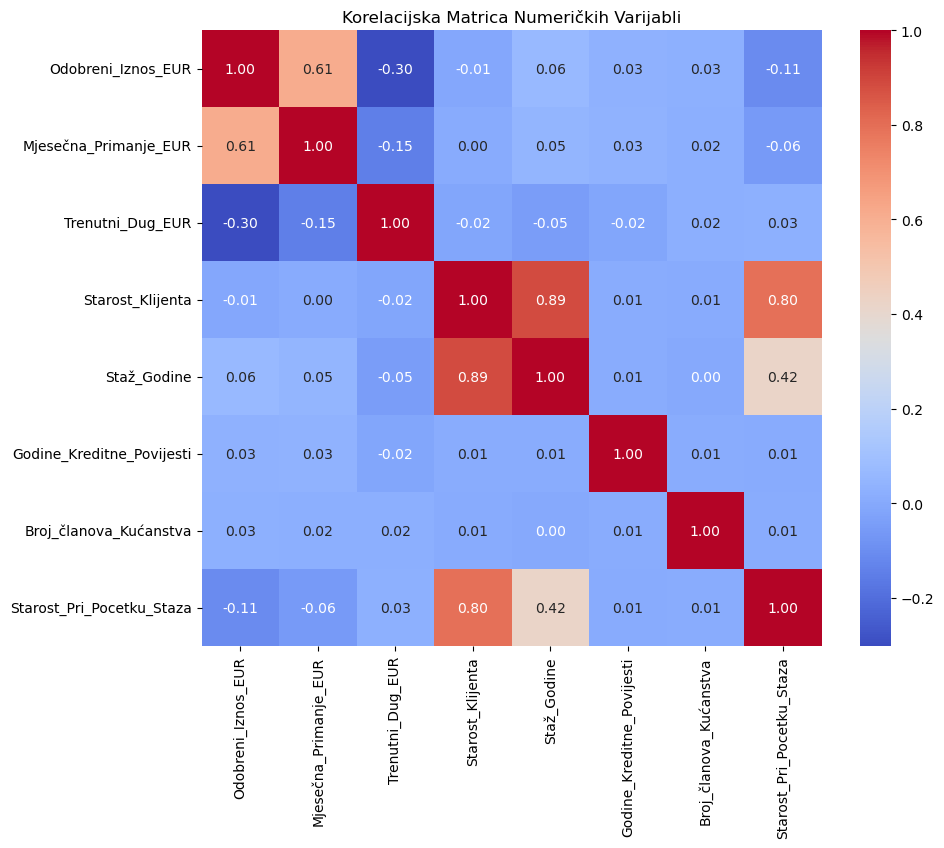

In [118]:
# definiram numeričke retke i stupce te izbacujem ID klijenta
numericke_kolone = bank7.select_dtypes(include=np.number).columns.tolist()
if 'ID_Klijenta' in numericke_kolone:
    numericke_kolone.remove('ID_Klijenta')
korelacijska_matrica = bank7[numericke_kolone].corr(method='pearson')

#vizualizacija
plt.figure(figsize=(10, 8))
sns.heatmap(korelacijska_matrica, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacijska Matrica Numeričkih Varijabli')
plt.show()

### Na temelju heatmape lakše je instiktivno razaznati djelove koje su zavisni. Primjerice odmah zamjećujemo da je starost klijenta usko vezana za godine staža. Nema sumnje da s povećanjem godina raste i staž. Nadalje starost klijenta usko je vezana uz starost pri početku staža, možda zvuči kontraintuitivno, ali 60-godišnja osoba sa 30 godina staža je kasnije počela raditi od 40-godišnje osobe sa 20 godina staža. Iako su mjesečna primanja u nešto manjoj mjeri, ali svakako utječu na odobreni iznos. Također postoji i obrnuto proporcionalna korelacija, primjerice trenutni dug i odobreni iznos. Nije mnogo izražena, ali je vidljiva i logična jer s povećanjem duga, odobreni iznos se smanjuje

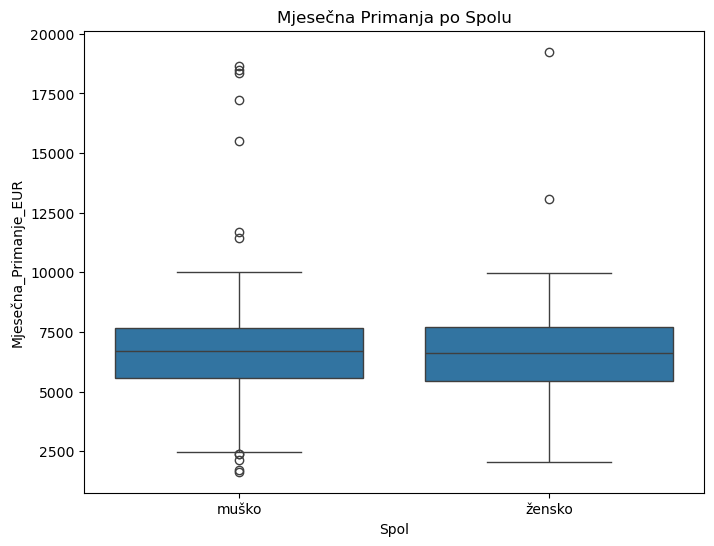

In [124]:
# Vizualizacija primanja boxplotom po spolu
plt.figure(figsize=(8, 6))
sns.boxplot(x='Spol', y='Mjesečna_Primanje_EUR', data=bank7)
plt.title('Mjesečna Primanja po Spolu')
plt.show()

### Vidimo kako su primanja otprilike podjednaka, no postoji više muških outliera u gornjoj i donjoj granici dok su ženski outlieri isključivo u gornjoj granici.

In [125]:
# Vizualizacija dvije kategoričke varijable kroz tablicu (spol i stanbeni status)
cross_tab = pd.crosstab(bank7['Spol'], bank7['Stambeni_Status'])
cross_tab

Stambeni_Status,podstanar,vlasnik
Spol,,
muško,1008,580
žensko,242,160


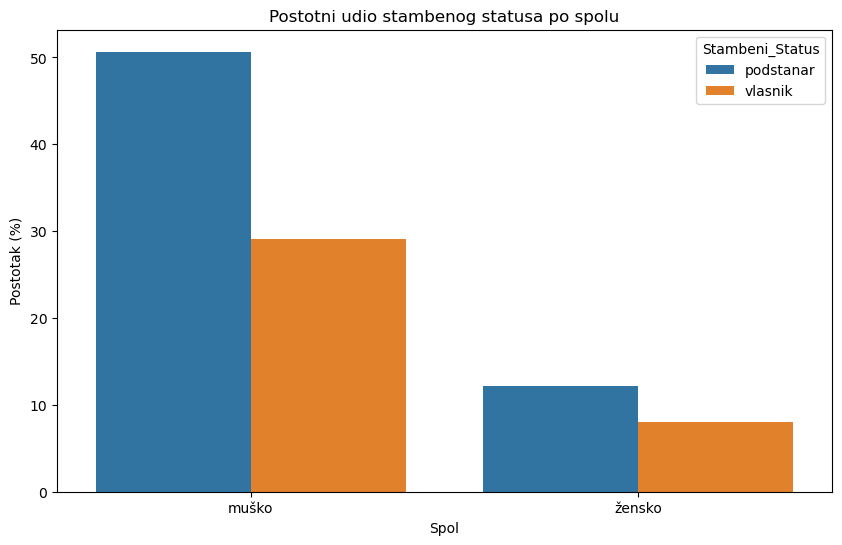

In [141]:
# Bar plot prikaz odnosa spola i stambenog statusa
cross_tab_norm = pd.crosstab(bank7['Spol'], bank7['Stambeni_Status'], normalize=True) * 100
cross_tab_norm_stacked = cross_tab_norm.stack().reset_index(name='Postotak')

plt.figure(figsize=(10, 6))
sns.barplot(x='Spol', y='Postotak', hue='Stambeni_Status', data=cross_tab_norm_stacked)
plt.title('Postotni udio stambenog statusa po spolu')
plt.ylabel('Postotak (%)')
plt.show()

In [131]:
### Kao što smo ranije zaključili, više ima muških ispitanika, a prema odnosu podstanar-vlasnik, više muškaraca su podstanari nego žene.

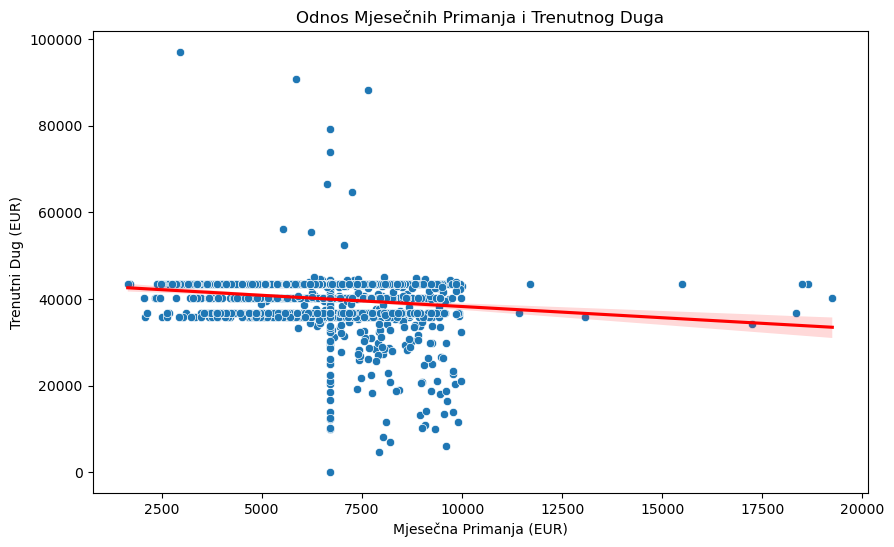

In [133]:
# Odnos trenutnog duga i mjesečnih primanja kroz scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mjesečna_Primanje_EUR', y='Trenutni_Dug_EUR', data=bank7)
sns.regplot(x='Mjesečna_Primanje_EUR', y='Trenutni_Dug_EUR', data=bank7, scatter=False, color='red') # Dodaje regresijsku liniju
plt.title('Odnos Mjesečnih Primanja i Trenutnog Duga')
plt.xlabel('Mjesečna Primanja (EUR)')
plt.ylabel('Trenutni Dug (EUR)')
plt.show()

In [134]:
# S porastom prihoda, dug pada

C:\Users\FOIStudent\AppData\Local\Temp\ipykernel_7756\1778369715.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Obrazovanje', y='Odobreni_Iznos_EUR', data=bank7, estimator=np.mean, ci=None) # ci=None uklanja confidence intervale


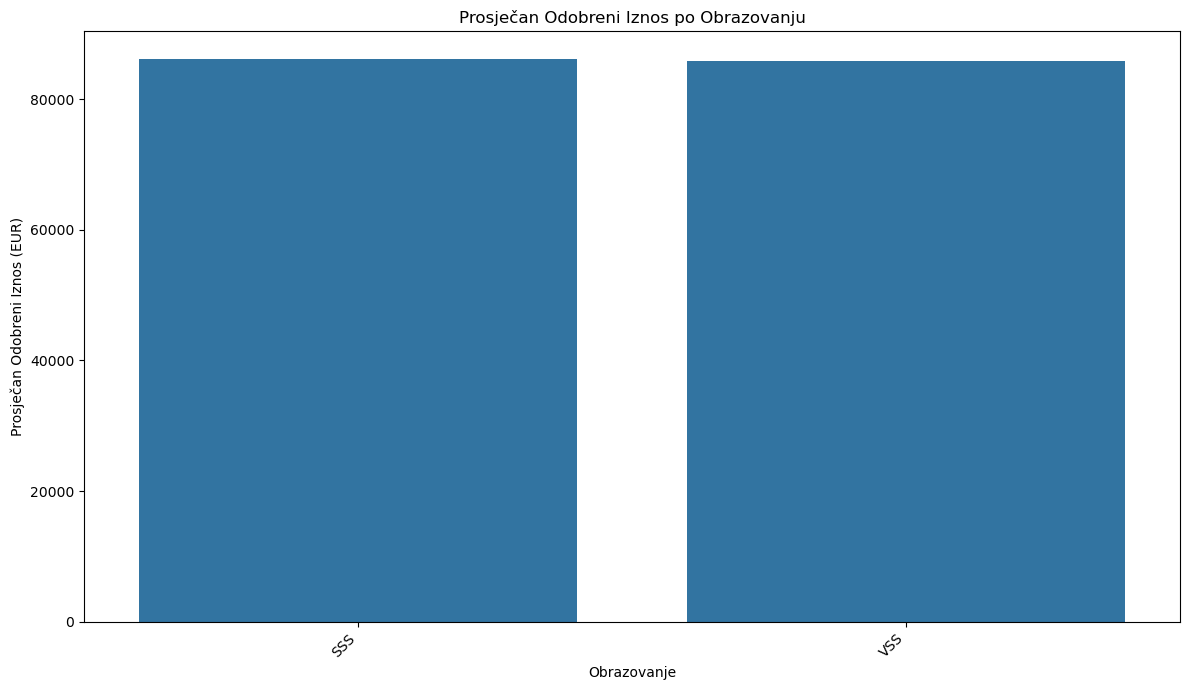

In [136]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Obrazovanje', y='Odobreni_Iznos_EUR', data=bank7, estimator=np.mean, ci=None) # ci=None uklanja confidence intervale
plt.title('Prosječan Odobreni Iznos po Obrazovanju')
plt.xlabel('Obrazovanje')
plt.ylabel('Prosječan Odobreni Iznos (EUR)')
plt.xticks(rotation=45, ha='right') # Rotira oznake na x-osi radi bolje čitljivosti
plt.tight_layout()
plt.show()

In [137]:
# Nema nikakve korelacije

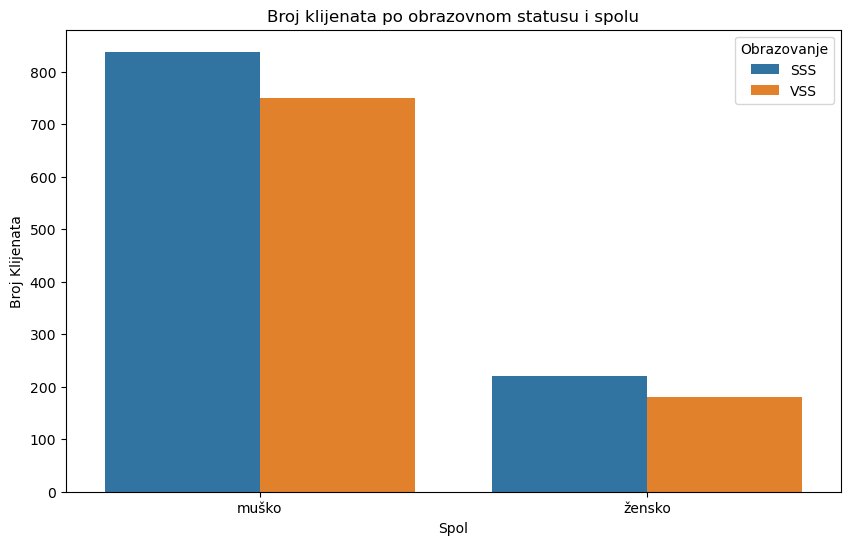

In [143]:
# Odnos obrazovanja i spola
# Bar plot prikaz odnosa spola i obrazovnog statusa
cross_tab_counts = pd.crosstab(bank7['Spol'], bank7['Obrazovanje'])
cross_tab_counts_stacked = cross_tab_counts.stack().reset_index(name='Broj_Klijenata')

plt.figure(figsize=(10, 6))
sns.barplot(x='Spol', y='Broj_Klijenata', hue='Obrazovanje', data=cross_tab_counts_stacked)
plt.title('Broj klijenata po obrazovnom statusu i spolu')
plt.ylabel('Broj Klijenata')
plt.show()

In [ ]:
# Interesantan prikaz, prema ovom grafikonnu odnos obrazovanja poprilično je sličan, no u brojčanom smislu: 

In [145]:
cross_tab_counts = pd.crosstab(bank7['Spol'], bank7['Obrazovanje'])
cross_tab_counts

Obrazovanje,SSS,VSS
Spol,,
muško,838,750
žensko,221,181


### Prema apsolutnoj vrijednosti više ima obrazovanih muškaraca nego žena (samo za 2.21%) stoga vrlo vjerojatno nije statistički značajna.